# Use Case Summary

## Objective Statement
Get an insight about how much the company spend on marketing budget

Get an insight about how much sales based on marketing budget

Get an insight about the correlation between marketing budget and sales

Get an insight about marketing strategy or planning based the model prediction

Create models to predict sales with simple linear regretion

Deploy the model using MLflow deployment


## Challenges

There is no explanation for each column

## Methodology / Analytic Technique

Descriptive analysis

Graph analysis

Modeling using Simple Linear Regression

Deployment using MLflow


# Business Benefit

Help Business to make decision about marketing strategy based on the prediction


## Expected Outcome

Get to know about how much the company spend on marketing budget

Get to know about how much sales based on marketing budget

Get to know about the correlation between marketing budget and sales

Recommendation based on model prediction

Making models to predict sales

Deploy the model using MLflow


## Business Understanding

A marketing budget is the sum of money a company assigns to marketing projects (paid advertising, sponsored content, etc.) aimed at product promotion. It helps startups and established companies manage resources efficiently and achieve business goals.

this case has some business question using the data:

how much the company spend on marketing budget?

how much sales based on marketing budget?

is there any correlation between marketing budget and sales?

how about the recommendation based on the model prediction?


# Data Understanding

## Source Data

Sorce Data: https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook

200 rows

2 columns


## Data Dictionary

Tv = marketing budget

Sales = total sales


# Data Preparation
Python version : 3.9.12

Packages Version : Pandas, numpy, matplotlib, seaborn, and sklearn, mlflow


**we import the required package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install mlflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#pip install mlflow[extras]

Defaulting to user installation because normal site-packages is not writeable


# Data Profilling

**we load and preview the first five rows of dataset**

In [4]:
df = pd.read_csv('tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


**we will see the column and row information from the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


tv marketing data has 200 row and 2 columns

**we wanna check missing value from the data**

In [6]:
df.isna().sum()

TV       0
Sales    0
dtype: int64

we can see that there is no missing value in the dataset tvmarketing

#  Data Cleansing

data is clean the data type is all correct and there is no missing value

# Exploratory Data Analysis

**we wanna see the statisic of numerical data**

In [7]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


From the analysis of tvmarketing data which contains 200 lines, the average cost spent on the TV marketing budget is **\$147.04** with the lowest cost spending **\$0.7** and the highest cost **\$296.4**, and the average sales is**\$14.02** with a lowest is **\$1.6** and the highest is **\$27**.

**we wanna know the modus from the TV column**

In [8]:
df['TV'].mode().values[0]

17.2

The most frequently used Marketing Budget is **\$17.2**

**we wanna know the modus from Sales column**

In [9]:
df['Sales'].mode().values[0]

9.7

The most frequently sold TV price is **\$9.7**

### Distribution
**we wanna see the distribution of marketing budget 'TV'**

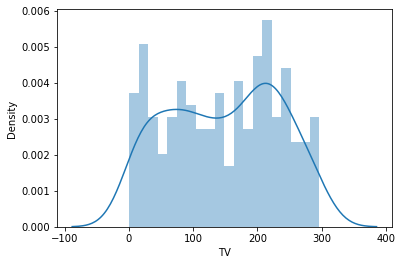

In [10]:
sns.distplot(df['TV'], bins=20);

**we wanna know the mean from the TV column**

In [11]:
df.TV.mean()

147.0425

**we wanna know the median from the TV column**

In [12]:
df.TV.median()

149.75

**we wanna know the modus from the TV column**

In [13]:
df.TV.mode().values[0]

17.2

Based on the graph above distribution of marketing budget 'TV' has the highest density of marketing Budget which is **\$200** dollars

**we wanna see the distribution of 'Sales'**

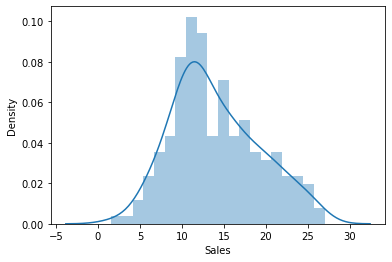

In [14]:
sns.distplot(df['Sales'], bins=20);

**we wanna know the mean from the Sales column**

In [15]:
df.Sales.mean()

14.022500000000003

**we wanna know the median from the Sales column**

In [16]:
df.Sales.median()

12.9

**we wanna know the modus from the Sales column**

In [17]:
df.Sales.mode()

0    9.7
Name: Sales, dtype: float64

Based on the data above, we can see that 'Sales' are mostly or have the highest density at values ​​of **\$10-15**


**we wanna see the relationship between marketing budget TV and Sales**

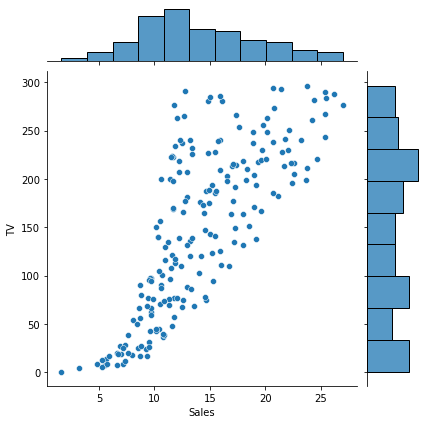

In [18]:
#  relationship between Sales dengan TV
sns.jointplot(x='Sales', y='TV', data=df);

Based on the graph above, we can see that the Sales and Marketing Budget of TV has a correlation, where the **higher the marketing costs** , **the greater the sales**. However, from the graph above there is also data that has high marketing costs but has low sales

# Feature Engineering

**We duplicate dataset to do scaling using MinMaxScaler** <br>
Features in the data have different value ranges. By normalizing the data using MinMaxScaler, the data will have the same scale and the model can learn faster and the accuracy of the model can increase.


In [19]:
# MinMaxScaler
df_copy = df.copy()
scaler = MinMaxScaler()
df_copy[['TV']] = scaler.fit_transform(df_copy[['TV']])
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


# Without Hyperparameter

## Preprocessing Modeling (without hyperparameter)

**we split and train the data, because there is quite a large amount of data in the dataset, we set the train size in 0.8**

In [20]:
x = df.drop(['Sales'],axis=1)
y = df['Sales']

x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size = 0.8, random_state = 42)

### Simple Linear Regression (Without hyperparameter)

**we fit into training the data**

In [21]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
regressor.coef_

array([0.04652973])

**we predict the result**

In [23]:
y_pred = regressor.predict(x_test)

**we plot the result**

In [24]:
result = pd.DataFrame({'Actual' : y_test, 'Predict': y_pred})
result

,Actual,Predict
95,16.9,14.717944
15,22.4,16.211548
30,21.4,20.748197
158,7.3,7.664036
128,24.7,17.370139
115,12.6,10.614021
69,22.3,17.207285
170,8.4,9.446125
174,11.5,17.467851
45,14.9,15.266995


**we wanna see the result using bar chart**

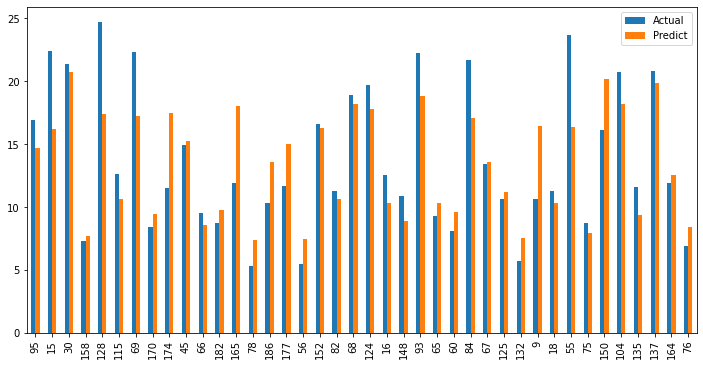

In [25]:
result.plot(kind = 'bar', figsize = (12,6))
plt.show()

**we wanna see a pattern of relationship between 2 variables by using scatter plot**

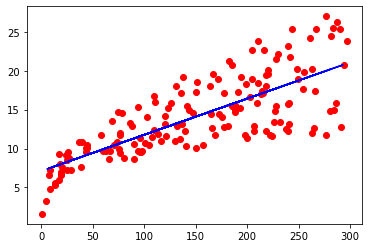

In [26]:
plt.scatter(x_train, y_train, color='red') 

plt.plot(x_test.values, y_pred, color='blue') 

plt.show()

From the graph above we can see that there is a positive relationship between the train data and the predictive data, the red dot indicates the train data which is close to the blue line (predictive data). This shows that **the model used is good enough** for sales predictions from the tvmarketing dataset.


# With Hyperparameter

**we do hyperparameter tuning to get the best parameter**

## Preprocessing Modeling (with hyperparameter)

**we split and train the data, because there is quite a large amount of data in the dataset, we set the train size in 0.8**

In [27]:
x_new = df_copy.drop(['Sales'],axis=1)
y_new = df_copy['Sales']

In [28]:
x_train_new, x_test_new, y_train_new, y_test_new =  train_test_split(x_new, y_new, train_size = 0.8, random_state = 42)

## Hyperparameter Tuning

**We do the hyperparamter tuning to get best parameter. First, we need to get the default paramater, then the best paramater, finally after we get the best parameter we fit to the model**

In [29]:
scores = cross_val_score(regressor, x_train_new, y_train_new, scoring='r2', cv=3)
scores

array([0.67562287, 0.49242015, 0.56765656])

In [30]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [31]:
parameters = {
    'copy_X' : [True, False],
    'fit_intercept' : [True, False],
    'n_jobs' : [None, -1],
    'normalize' : [True, False],
    'positive' : [True, False]
}

In [32]:
grid = GridSearchCV(estimator=regressor, param_grid= parameters, cv=3)

In [33]:
best_model = grid.fit(x_train_new, y_train_new)

In [35]:
best_model.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': True}

## Simple Linear Regression (with hyperparameter)

**fit the the best parameter that we get before to the model, copy_X': True,
 'fit_intercept': True,  'n_jobs': None,  'normalize': True, and 'positive': True**

In [51]:
regressor_new = LinearRegression(positive=True, normalize=True, n_jobs=None, fit_intercept=True, copy_X=True)

In [52]:
model_new = regressor_new.fit(x_train_new, y_train_new)

In [53]:
y_pred_new = regressor_new.predict(x_test_new)

# Evaluate Model

**we evaluate the model to get to know MAE, MAPE, RSME and R Square**

## Without Hypertuning

**we wanna know the MAE (mean absolute error) a metric that tells us the mean absolute difference between the predicted values and the actual values in a dataset**

In [54]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

2.444420003751042

**we wanna know the MAPE (mean absolute percentage error) a metric that tells us measures accuracy of a forecast system**

In [55]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE

0.1866874631359211

**we wanna know the RMSE (rooam mean squared error) or it can be interpreted as the standard deviation of the unexplained variance**

In [56]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

3.194472431998898

**we wanna know the R square, a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable**

In [57]:
R2 = r2_score(y_test, y_pred)
R2

0.6766954295627077

### Evaluate model
Based on the results of the evaluation that has been carried out, we can see that **the MAE value is 2.44**, the smaller the MAE value, the more accurate the model used. The MAPE value is 0.18 or 18%, this figure indicates the percentage error of the predictions made, the smaller the percentage error value in MAPE, the more accurate the forecasting results, **for MAPE is  18% it is known that the predictions made are still classified as good for prediction**. **The RMSE value is 3.19**, RMSE indicates that the variation in values ​​produced by a forecast model is close to the variation in the observed value. RMSE measures how different the sets of values ​​are. The smaller the RMSE value, the closer the predicted and detected values ​​are. **The value of R2 is 0.67 or 67%**, R square has a value between 0 – 1 provided that the closer to number one means the better, R2 has a value of 0.67, meaning that **67% of the distribution of the dependent variable can be explained by the independent variable**. The remaining 33% cannot be explained by independent variables or can be explained by variables outside the independent variables (component errors).

## With Hypertuning

**we wanna know the MAE (mean absolute error) a metric that tells us the mean absolute difference between the predicted values and the actual values in a dataset**

In [58]:
MAE_new = mean_absolute_error(y_test_new, y_pred_new)
MAE_new

2.4444200037510426

**we wanna know the MAPE (mean absolute percentage error) a metric that tells us measures accuracy of a forecast system**

In [59]:
MAPE_new = mean_absolute_percentage_error(y_test_new, y_pred_new)
MAPE_new

0.18668746313592113

**we wanna know the RMSE (rooam mean squared error) or it can be interpreted as the standard deviation of the unexplained variance**


In [60]:
RMSE_new = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
RMSE

3.194472431998898

**we wanna know the R square, a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable**

In [61]:
R2_new = r2_score(y_test_new, y_pred_new)
R2_new

0.6766954295627075

Based on the results of the evaluation that has been carried out, we can see that **the MAE value is 2.44**, the smaller the MAE value, the more accurate the model used. The MAPE value is 0.18 or 18%, this figure indicates the percentage error of the predictions made, the smaller the percentage error value in MAPE, the more accurate the forecasting results, **for MAPE is  18% it is known that the predictions made are still classified as good for prediction**. **The RMSE value is 3.19**, RMSE indicates that the variation in values ​​produced by a forecast model is close to the variation in the observed value. RMSE measures how different the sets of values ​​are. The smaller the RMSE value, the closer the predicted and detected values ​​are. **The value of R2 is 0.67 or 67%**, R square has a value between 0 – 1 provided that the closer to number one means the better, R2 has a value of 0.67, meaning that **67% of the distribution of the dependent variable can be explained by the independent variable**. The remaining 33% cannot be explained by independent variables or can be explained by variables outside the independent variables (component errors).

There is no difference in the evaluation value of the data that we do the hyperparameter tuning and not

## Compare

**we wanna know the difference between the model that use hyperparameter tuning and not**

In [62]:
RMSE_comp = pd.DataFrame({
    "RMSE" : ["Without", "with"],
    "Values" :  [RMSE, RMSE_new]
})

RMSE_comp

,RMSE,Values
0,Without,3.194472
1,with,3.194472


There is no difference in the RSME results, which use hypertuning or do not produce a value of 3.19

In [63]:
MAE_comp = pd.DataFrame({
    "MAE" : ["Without", "with"],
    "Values" :  [MAE, MAE_new]
})

MAE_comp

,MAE,Values
0,Without,2.44442
1,with,2.44442


Same with RSME, the use of hypertuning has no effect on producing MAE values, so the average difference between actual and predict data is 2.44

In [64]:
MAPE_comp = pd.DataFrame({
    "MAPE" : ["Without", "with"],
    "Values" :  [MAPE, MAPE_new]
})

MAPE_comp

,MAPE,Values
0,Without,0.186687
1,with,0.186687


The use of hyperparameter tuning on the MAPE value has a value of 0.186, this is the same as not using hyperparameter tuning

In [65]:
R2_comp = pd.DataFrame({
    "R2" : ["Without", "with"],
    "Values" :  [R2, R2_new]
})

R2_comp

,R2,Values
0,Without,0.676695
1,with,0.676695


There is no difference so whether or not using hyperparameters is good.

The model that was performed by hyperparameter tuning showed no difference in values ​​for MAE, MAPE and RSME, which means that the use of hyperparameters in this dataset does not have to be done.

# Deployment

**Deployment using MLflow, MLflow is an open-source library for managing the lifecycle of your machine learning experiments. MLflow Tracking is a component of MLflow that logs and tracks your training job metrics and model artifacts, no matter your experiment's environment--locally on your computer, on a remote compute target**

In [66]:
# Data Profiling

# Import Packages

import logging
import mlflow.sklearn
import mlflow
from urllib.parse import urlparse
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# mematikan git
os.environ["GIT_PYTHON_REFRESH"] = "quiet"
import git

import warnings
warnings.filterwarnings('ignore')


logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

# Load Dataset

df = pd.read_csv('tvmarketing.csv')

# Preprocessing Modeling

x = df.drop(['Sales'], axis=1)
y = df['Sales']

# Splitting and Train Data

X_train, X_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=42)


# Eval Metrics

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mape = mean_absolute_percentage_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, mape, r2

# Modeling

with mlflow.start_run():
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    (rmse, mae, mape, r2) = eval_metrics(y_test, y_pred)

    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  MAPE: %s" % mape)
    print("  R2: %s" % r2)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mape", mape)
    mlflow.log_metric("r2", r2)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(
            lr, "model", registered_model_name="Linear Regression")
    else:
        mlflow.sklearn.log_model(lr, "model")

  RMSE: 3.194472431998898
  MAE: 2.444420003751042
  MAPE: 0.1866874631359211
  R2: 0.6766954295627077


# Result

1. From the analysis of tvmarketing data which contains 200 lines, the average cost spent on the TV marketing budget is **\$147.04** with the lowest cost spending **\$0.7** and the highest cost **\$296.4**, and the average sales is**\$14.02** with a lowest is **\$1.6** and the highest is **\$27**.

2. Based on the graph above distribution of marketing budget 'TV' has the highest density of marketing Budget which is **\$200** dollars

3. Based on the data above, we can see that 'Sales' are mostly or have the highest density at values ​​of **\$10-15**

4. Based on the graph above, we can see that the Sales and Marketing Budget of TV has a correlation, where the **higher the marketing costs** , **the greater the sales**. However, from the graph above there is also data that has high marketing costs but has low sales

5. From the graph above we can see that there is a positive relationship between the train data and the predictive data, the red dot indicates the train data which is close to the blue line (predictive data). This shows that **the model used is good enough** for sales predictions from the tvmarketing dataset.

6. Based on the results of the evaluation that has been carried out, we can see that **the MAE value is 2.44**, the smaller the MAE value, the more accurate the model used. The MAPE value is 0.18 or 18%, this figure indicates the percentage error of the predictions made, the smaller the percentage error value in MAPE, the more accurate the forecasting results, **for MAPE is  18% it is known that the predictions made are still classified as good for prediction**. **The RMSE value is 3.19**, RMSE indicates that the variation in values ​​produced by a forecast model is close to the variation in the observed value. RMSE measures how different the sets of values ​​are. The smaller the RMSE value, the closer the predicted and detected values ​​are. **The value of R2 is 0.67 or 67%**, R square has a value between 0 – 1 provided that the closer to number one means the better, R2 has a value of 0.67, meaning that **67% of the distribution of the dependent variable can be explained by the independent variable**. The remaining 33% cannot be explained by independent variables or can be explained by variables outside the independent variables (component errors).

There is no difference in the evaluation value of the data that we do the hyperparameter tuning and not


# Recommendation

Companies can optimize marketing budget costs for marketing in order to get high profits, optimizing marketing costs does not have to use large costs because it can be seen from the data that there is a large marketing budget but low selling prices


# Deployment

MLflow is a platform to streamline machine learning development, including tracking experiments, packaging code into reproducible runs, and sharing and deploying models. MLflow offers a set of lightweight APIs that can be used with any existing machine learning application or library (TensorFlow, PyTorch, XGBoost, etc), wherever you currently run ML code (e.g. in notebooks, standalone applications or the cloud). MLflow's current components are:

* MLflow Tracking: An API to log parameters, code, and results in machine learning experiments and compare them using an interactive UI.
* MLflow Projects: A code packaging format for reproducible runs using Conda and Docker, so you can share your ML code with others.
* MLflow Models: A model packaging format and tools that let you easily deploy the same model (from any ML library) to batch and real-time scoring on platforms such as Docker, Apache Spark, Azure ML and AWS SageMaker.
* MLflow Model Registry: A centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of MLflow Models.


**In the above data the use of mlflow is very useful for tracking the above model to predict the MAPE, MAE, RMSE and R2 Scores from implementing Linear Regression on this data. Model tracking is also to maintain model consistency if new data is entered**
